In [88]:
import numpy as np
from numpy.random import default_rng
import matplotlib.pyplot as plt
from scipy.stats import probplot
from scipy.stats import kstest, norm
from numpy.random import choice

<h3> A. Function that returns 1-D Array of 200 i.i.d. draws </h3>

In [89]:
def t_draw_200(BG, degrees):
    return BG.standard_t(degrees, size=200)

print(t_draw_200(np.random.default_rng(), 5))

[-2.27604796e+00  8.87379846e-02  1.60595921e-01 -1.47171914e+00
  8.02538964e-01 -1.98324207e+00  3.01659547e+00 -1.93725182e+00
 -3.24110343e-02 -4.07802014e-01 -1.22762019e+00 -6.42038099e-01
  7.89516501e-01 -6.39393404e-01  9.63147125e-02  1.65443150e-01
 -1.31987488e-01  3.80272954e-01  4.07031158e-01  1.96698241e+00
 -1.65463456e-01  1.69534790e-01  8.71623688e-01 -3.70640325e-01
 -2.82044141e+00 -4.37547895e-01  2.83116873e-01  1.22796264e+00
 -1.37444201e-01  6.03884083e-01 -6.80924071e-02  1.86041880e+00
  7.60572281e-01 -4.61664713e-01  2.72564509e-03 -5.48619188e-01
  1.95291142e+00 -6.75814505e-01 -1.09038420e+00 -3.28788679e-01
 -1.68445195e+00  2.18204960e-01 -1.11436659e+00 -2.41682623e-01
  2.13653783e+00 -1.15386754e+00  8.72146598e-02  1.39606559e+00
 -2.51038169e+00 -1.12896154e+00  6.24222850e-01  5.43742026e-01
 -5.66117684e-01 -1.02021363e-01 -2.24307276e-01 -4.08777431e-01
  5.90347372e-01  9.18713200e-02  1.03637338e+00 -6.90504345e-01
 -2.07545342e+00 -2.14002

<h3> B. Function that returns 1-D array dependent on replacement parameter </h3>

In [90]:
def BGAR(bg, a, r: bool):
    return bg.choice(a, size=len(a), replace=r)

Testing code using 1 example Array:

In [91]:
example_array = np.random.standard_t(5, size=10)

BGAR1 = BGAR(np.random.default_rng(), example_array, True)
BGAR2 = BGAR(np.random.default_rng(), example_array, False)

print(f"Random Draws with Replacement: {BGAR1}")
print(f"Random Draws without Replacement: {BGAR2}")

Random Draws with Replacement: [ 0.11515486 -0.15795379 -0.71856955 -0.71856955 -3.23898074 -0.15795379
 -0.09536298 -0.71856955  0.96036091  1.20280009]
Random Draws without Replacement: [ 1.30250796 -0.16990712  0.96036091  0.85071685  0.11515486  1.20280009
 -0.09536298 -3.23898074 -0.15795379 -0.71856955]


<h3> C. Function that returns probaility plot of 1-D array vs. a N(0,1) distribution. </h3>

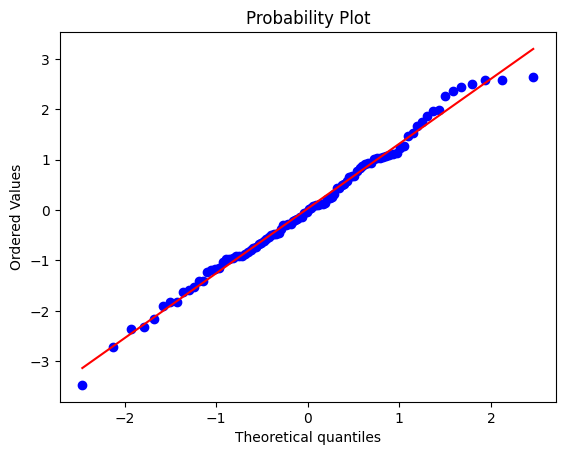

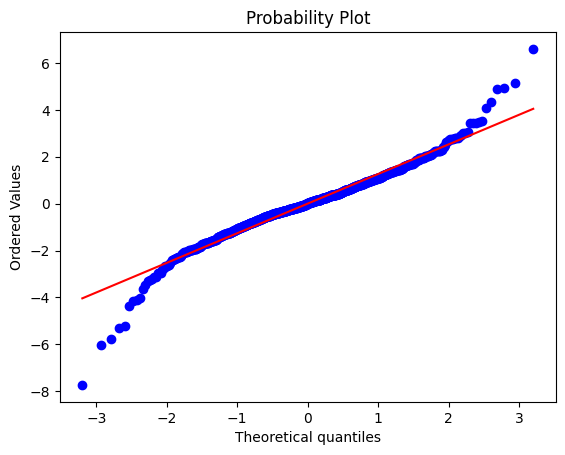

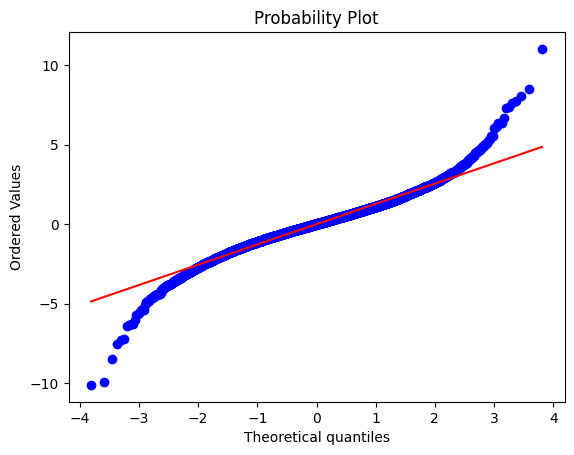

In [92]:
def pplot(s):
    probplot(s, dist="norm", plot=plt)
    plt.show()


pplot(np.random.default_rng().standard_t(5, size=100))
pplot(np.random.default_rng().standard_t(5, size=1000))
pplot(np.random.default_rng().standard_t(5, size=10000))

<h3> D. Function that returns probability of rejecting H0 of a Kolmogorov-Smirnov test dependent on 1-D array. </h3>

In [93]:
def BGAT(bg, a, T: int):
    count = 0
    for _ in range(T):
        boot = bg.choice(a, size=len(a), replace=True)
        p_value = kstest(boot, 'norm', args=(0, 1)).pvalue
        if p_value < 0.05:
            count += 1
    return count / T

Testing code with 3 different arrays (power):

In [94]:

example_array1 = np.random.standard_t(5, size=100)
example_array2 = np.random.standard_t(5, size=1000)
example_array3 = np.random.standard_t(5, size=10000)  
probability_count = 5

results = []

print("Results for Array 1:")
for i in range(probability_count):
    rng = np.random.default_rng()
    result = BGAT(rng, example_array1, 1000)
    
    results.append(result)
    
    # Print the result
    print(f"{i+1}. Probability H0 is rejected at a 5% significance level: {result}")
print("\nResults for Array 2:")
for i in range(probability_count):
    rng = np.random.default_rng()
    result = BGAT(rng, example_array2, 1000)
    
    results.append(result)
    
    # Print the result
    print(f"{i+1}. Probability H0 is rejected at a 5% significance level: {result}")
print("\nResults for Array 3:")
for i in range(probability_count):
    rng = np.random.default_rng()
    result = BGAT(rng, example_array3, 1000)
    
    results.append(result)
    
    # Print the result
    print(f"{i+1}. Probability H0 is rejected at a 5% significance level: {result}")


Results for Array 1:
1. Probability H0 is rejected at a 5% significance level: 0.11
2. Probability H0 is rejected at a 5% significance level: 0.11
3. Probability H0 is rejected at a 5% significance level: 0.111
4. Probability H0 is rejected at a 5% significance level: 0.111
5. Probability H0 is rejected at a 5% significance level: 0.118

Results for Array 2:
1. Probability H0 is rejected at a 5% significance level: 0.97
2. Probability H0 is rejected at a 5% significance level: 0.962
3. Probability H0 is rejected at a 5% significance level: 0.948
4. Probability H0 is rejected at a 5% significance level: 0.954
5. Probability H0 is rejected at a 5% significance level: 0.96

Results for Array 3:
1. Probability H0 is rejected at a 5% significance level: 1.0
2. Probability H0 is rejected at a 5% significance level: 1.0
3. Probability H0 is rejected at a 5% significance level: 1.0
4. Probability H0 is rejected at a 5% significance level: 1.0
5. Probability H0 is rejected at a 5% significance 

Testing size:

In [95]:

example_array1 = np.random.standard_t(1, size=1000)
example_array2 = np.random.standard_t(5, size=1000)
example_array3 = np.random.standard_t(10, size=1000)  
probability_count = 5

results = []

print("Results for Array 1:")
for i in range(probability_count):
    rng = np.random.default_rng()
    result = BGAT(rng, example_array1, 1000)
    
    results.append(result)
    
    # Print the result
    print(f"{i+1}. Probability H0 is rejected at a 1% significance level: {result}")
print("\nResults for Array 2:")
for i in range(probability_count):
    rng = np.random.default_rng()
    result = BGAT(rng, example_array2, 1000)
    
    results.append(result)
    
    # Print the result
    print(f"{i+1}. Probability H0 is rejected at a 5% significance level: {result}")
print("\nResults for Array 3:")
for i in range(probability_count):
    rng = np.random.default_rng()
    result = BGAT(rng, example_array3, 1000)
    
    results.append(result)
    
    # Print the result
    print(f"{i+1}. Probability H0 is rejected at a 10% significance level: {result}")

Results for Array 1:
1. Probability H0 is rejected at a 1% significance level: 1.0
2. Probability H0 is rejected at a 1% significance level: 1.0
3. Probability H0 is rejected at a 1% significance level: 1.0
4. Probability H0 is rejected at a 1% significance level: 1.0
5. Probability H0 is rejected at a 1% significance level: 1.0

Results for Array 2:
1. Probability H0 is rejected at a 5% significance level: 0.925
2. Probability H0 is rejected at a 5% significance level: 0.913
3. Probability H0 is rejected at a 5% significance level: 0.926
4. Probability H0 is rejected at a 5% significance level: 0.917
5. Probability H0 is rejected at a 5% significance level: 0.915

Results for Array 3:
1. Probability H0 is rejected at a 10% significance level: 0.176
2. Probability H0 is rejected at a 10% significance level: 0.19
3. Probability H0 is rejected at a 10% significance level: 0.163
4. Probability H0 is rejected at a 10% significance level: 0.186
5. Probability H0 is rejected at a 10% signifi